## Welcome to Python!

I know what you are all thinking...finally!

Okay let's check out the basics of Python.

I am typing this inside of Jupyter notebook which yields a markdown/programming environment similar to R markdown.

First let us discuss the basics of Python. Here are our standard types:

In [11]:
3

3

In [12]:
type(3)

int

In [13]:
3.0

3.0

In [14]:
type(3.0)

float

In [15]:
type('c')

str

In [16]:
type('ca')

str

In [17]:
type("ca")

str

In [18]:
True

True

In [19]:
type(True)

bool

In [20]:
type(T) #Not defined unlike R

NameError: name 'T' is not defined

In [21]:
type(true)

NameError: name 'true' is not defined

In [22]:
type(x=3) #An assignment does not return a value. This is different from C/C++/R.

TypeError: type() takes 1 or 3 arguments

In [23]:
x=2 #assignment

In [24]:
x

2

In [25]:
x==3 #Boolean

False

### Lists and dictionaries
Okay let's check out some syntetic data structures. 

In [26]:
y = [4.5,x, 'c'] #lists can contain different types

In [27]:
type(y)

list

In [28]:
y[0] #zero indexing

4.5

In [29]:
y[1]

2

In [30]:
y[-1] #last entry

'c'

In [31]:
y[-2] 

2

In [32]:
len(y)

3

In [33]:
y = y + ['a','b','d']

In [34]:
y

[4.5, 2, 'c', 'a', 'b', 'd']

In [35]:
y[1:3] #Slicing!

[2, 'c']

In [36]:
y[1:4]

[2, 'c', 'a']

In [37]:
y[1:6:2] # jump by twos

[2, 'a', 'd']

In [38]:
y[:] #copy entire list

[4.5, 2, 'c', 'a', 'b', 'd']

In [39]:
z = y

In [40]:
z[1]=3

In [41]:
y

[4.5, 3, 'c', 'a', 'b', 'd']

In [42]:
z = y[:]

In [43]:
z[1]=2

In [44]:
z == y

False

In [45]:
z[1]

2

In [46]:
y[1]

3

In [47]:
z = y[::-1] #Reverse order

In [48]:
z

['d', 'b', 'a', 'c', 3, 4.5]

Now let us look at dictionaries.

In [49]:
a = {'x' : 1, 'y' : z, 'z' : 'entry'}

In [50]:
a

{'x': 1, 'y': ['d', 'b', 'a', 'c', 3, 4.5], 'z': 'entry'}

In [51]:
a['x']

1

In [52]:
a['y'][3]

'c'

In [53]:
a.values()

dict_values([1, ['d', 'b', 'a', 'c', 3, 4.5], 'entry'])

In [54]:
a.keys()

dict_keys(['x', 'y', 'z'])

In [55]:
'abc'+'efg'

'abcefg'

In [56]:
'abc'[2]

'c'

In [57]:
'abcdef'[-2]='x' # strings are immutable (as usual)

TypeError: 'str' object does not support item assignment

In [58]:
'abc'.upper()

'ABC'

There are also tuples, which are non-transformable.

In [59]:
x = (1,2,3)

In [60]:
x

(1, 2, 3)

In [61]:
type(x)

tuple

In [62]:
x[2]

3

In [63]:
x[-2]=3 # Fails

TypeError: 'tuple' object does not support item assignment

### List and dictionary comprehensions

Okay, now some of my favorite features, list and dictionary comprehensions, which allow us to use syntax similar to the mathematician's set notation

In [64]:
w = [ a**2 for a in range(10)]

In [65]:
w

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Note that exponentiation in python is done with the symbol ** 

Also note that the range function works a bit like slicing.

In [66]:
[a for a in range(1,20,2)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

We can also select subsets:

In [67]:
[a for a in range(1,20) if a % 2 != 0]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

## An example with functions

Just for fun let's see how to build a simple encrypter. First let us import a variable of printable characters from the module string and denote it by chars.

In [68]:
from string import printable as chars

In [69]:
chars

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [70]:
lc = len(chars); lc

100

In [71]:
codebook = {chars[i] : chars[(i+lc//2)%lc] for i in range(lc)}

There is a couple new things going on in this previous line, so let's unpack it. First we have dictionary comprehension, which is defined like a list comprehension. We have used the integer division operateor // and the integer modulus operator %.

In [72]:
codebook['a']

'Y'

In [73]:
codebook['Y']

'a'

Now we are going to use one of the three core functions from functional programming (map, reduce, filter), namely reduce. This goes through a list item by item and applies a two variable function using an accumulated value for the first argument and the list element for the second. We only need to use this two variable function once, so we will use an anonymous/lambda function. 

Finally, it is important to note the absence of brackets indicating the start and end of the function. Python accomplishes this using spacing. This is very unusual, but in Python spacing has meaning and if you use inconsistent spacing your program will not run.

In [74]:
from functools import reduce

In [75]:
def encode_decode(s):
    return reduce(lambda x,y: x+codebook[y],s,"")

In [76]:
encrypted = encode_decode('This is a secret message'); encrypted

"5&';I';IYI;#!:#<I+#;;Y%#"

In [77]:
encode_decode(encrypted)

'This is a secret message'

### Numpy and Pandas

Unlike R, Python was not designed for statistical analysis. Python was designed as a general purpose high level programming language. However, one of Python's strongest features is an truly vast collection of easy to use libraries (called modules) that drastically simplify our lives.


Two key core pieces of R functionality are lacking. We do not have an analogue of vectors (efficient lists containing only one type of element), so we are also lacking matrices and tensors, which are just fancier vectors. We are also lacking the data frame abstraction which plays a central role in R. 

Vector functionality comes from [numpy](http://www.numpy.org/) which is usually imported as np. This provides fast vectors and vectorized operations and should be used when possible instead of lists of numerical data. Dataframes come from [pandas](http://pandas.pydata.org/pandas-docs/stable/) which is usually imported as pd. Pandas builds on numpy and is part of the [scipy](https://www.scipy.org/) ecosystem, which includes many numerical libraries including more advanced statistics and linear algebra functions. The scipy ecosystem also includes [matplotlib](https://matplotlib.org/) which is a pretty complex/flexible plotting library. I should also mention [scikit-learn](
http://scikit-learn.org/stable/) which is a standard machine learning library (although surprisingly limited) is built on scipy.

In [78]:
import numpy as np

In [79]:
a=np.arange(10)

In [80]:
np.sin(a) # vectorized operation

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

A useful numpy feature (although it takes some getting used to) is broadcasting, which is similar to functionality in R, which automatically converts an array of one shape into another shape when performing various operations according to these [rules](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html). Broadcasting can easiliy lead to bugs and confusion, so try to be careful.

In [81]:
a*2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [82]:
list(range(10))*2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [83]:
a*a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [84]:
a.a

AttributeError: 'numpy.ndarray' object has no attribute 'a'

In [85]:
a.shape

(10,)

In [86]:
b=a.reshape(10,1)

In [87]:
b

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [88]:
b.T

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [89]:
b.T.shape

(1, 10)

In [90]:
c=np.dot(a,b); c

array([285])

In [91]:
c.shape

(1,)

In [92]:
d=np.zeros(shape=(2,3)); d

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [93]:
e = np.ones_like(d); e

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [94]:
f = np.ndarray(shape = (2,3,4), buffer = np.array(list(range(24))),dtype = np.int)

In [95]:
f

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [96]:
f[1,2,3]

23

In [97]:
f[1,1:3,3]

array([19, 23])

In [98]:
f[:,1:3,3]

array([[ 7, 11],
       [19, 23]])

In [99]:
for x in f:
    print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [100]:
for outer in f:
    for inner in outer:
        for really_inner in inner:
            print(really_inner)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [101]:
import pandas as pd

In [102]:
df = pd.read_csv("crypto-markets.csv")

In [103]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [104]:
df.symbol.unique()

array(['BTC', 'ETH', 'XRP', ..., '9COIN', 'BT1', 'BT2'], dtype=object)

In [105]:
len(df.symbol.unique())

1369

In [106]:
df['symbol'].unique()

array(['BTC', 'ETH', 'XRP', ..., '9COIN', 'BT1', 'BT2'], dtype=object)

In [107]:
small_df = df.head(25)

In [108]:
small_df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0,1248470000,0.8767,15.74


In [109]:
small_df[['date', 'close']]

,date,close
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
5,2013-05-03,97.75
6,2013-05-04,112.50
7,2013-05-05,115.91
8,2013-05-06,112.30
9,2013-05-07,111.50


In [110]:
small_df[4:6]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03


In [111]:
small_df[4] # fails

KeyError: 4

In [112]:
small_df.loc[4]

slug              bitcoin
symbol                BTC
name              Bitcoin
date           2013-05-02
ranknow                 1
open               116.38
high                125.6
low                 92.28
close              105.21
volume                  0
market         1292190000
close_ratio        0.3881
spread              33.32
Name: 4, dtype: object

In [113]:
small_df.loc[4,"open"]

116.38

In [114]:
small_df.iloc[4,4]

1

Pay attention to the syntax for referencing. Think of the loc and iloc objects as dictionaries which will pull up the relevant pieces of the data frame and allow slicing notation (which is now inclusive on both ends). The difference is that loc searches by name and iloc only searches by numerical index.

In [115]:
type(small_df.loc[4:4])

pandas.core.frame.DataFrame

In [116]:
type(small_df.loc[4])

pandas.core.series.Series

In [117]:
df['date'] = pd.to_datetime(df['date'])

In [118]:
df['date'].head()

0   2013-04-28
1   2013-04-29
2   2013-04-30
3   2013-05-01
4   2013-05-02
Name: date, dtype: datetime64[ns]

Select only the first few symbols.

In [119]:
mask = df['symbol'].isin(df['symbol'].unique()[1:5])
trim_df = df[mask]

In [120]:
from ggplot import *

/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/justin/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [121]:
gg = ggplot(aes(x='date',y='close',color='symbol'),data = trim_df) + geom_line() + ggtitle("Cryptocurrency prices") + scale_y_log() + \
  scale_x_date() + ylab("Closing price (log-scale)") + xlab("Date")

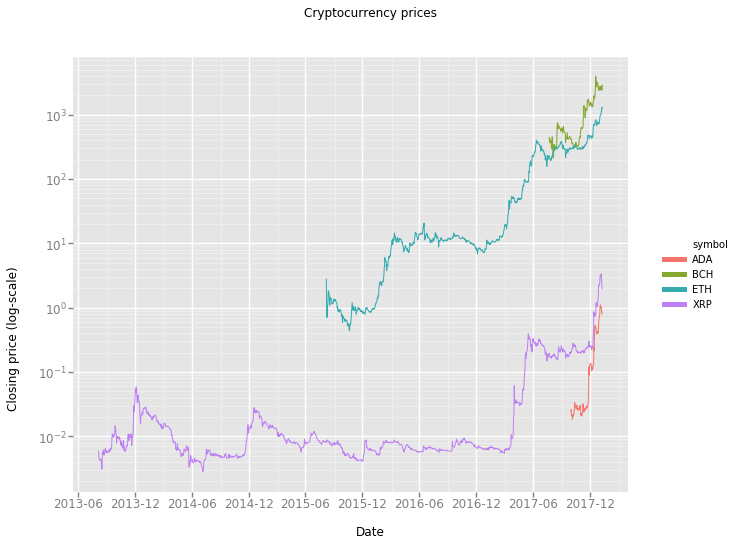

In [122]:
gg.show()